## Really complicated dna differentiation

Imagine a chain of nucleotides, divided in genes and intragenic DNA. Genes must be functioning, so they have a pattern, intragenic DNA not, so it can be random.

...intagrenic----gene----intragenic---gene---intragenic....

GENES

We have N genes Genes have the same order among neanderthal and humans:

Hair--Height--Eyes--Beard.. <- Neanderthal Hair--Height--Eyes--Beard.. <- Human

Humans and neanderthal are similar, so they have similar genes. Hence for a sigle gene i decided to have different variants, like brown hair, blond hairs, but they have to differ for small variation otherwise you would be bald.

From a logic point of view, change a small number of nucleotides from a random sequence so you have the variants, but they keep the same lenght in all the variants.

Genes have correlations between themselves, decided randomly between a random number of genes. For example Genes 1,8,15 are correlated in humans, correlations between 3 elements-> why? 3 is sampled from a "discrete gaussian", why 1,8,15 choseen random.

INTRAGENIC

We have N+1 intragenic sequence, of variable lenght interposed between genes.

How humans differ from neanderthal??

Intragenic dna different in lenght, for example in a human intragenic dna between genes 1 and 2, contains 100 nucleotides, while in the neanderthal 90. Correlations between different genes. like neanderthal correlates Nose and Beard, while human Height and Fat percentage.

How humans differ from humans and neanderthal from neanderthal?

Same intragenic lenght, but different nucleotides. Different genes variants.


In [1]:
#import tensorflow as tensorflow
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout, concatenate
from keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU, Bidirectional
from keras import regularizers

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import tfidTransformer

tokenizer = Tokenizer()

#import tensorflow as tensorflow
#if tensorflow.test.gpu_device_name():
#    print('Default GPU Device: {}'.format(tensorflow.test.gpu_device_name()))
#else:
#    print("Please install GPU version of tensorflow")

Using TensorFlow backend.


In [2]:
#Manopole
#decide the percentage of geneDNA in a sentence.
pc_genes=0.75

#How many genes?
N_genes= 50

#Choose genes to correlate

#How many?
avg_dimension_of_correlation_clusters=7

b=0.5 #how different are different genes ? max 0.5
fraction_of_mutations_per_gene=0.3#percentage of random mutations in gene variants
variants=4 #how may variants?
param_mc_a= 0.9
det=(1-param_mc_a)/3 # how much deterministic is the markov chain 0 MAX 0.25 Min  shuffle(prob(det det det 1-3*det))
forward_mc = False#do you want forward markov chain?


N_people= 20000
sentence_length= 1500 #HOW LONG A SENTENCE in letters
word_length=5 #HOW LONG A WORD in letters

#do you want same intragenic location in neanderthals and humans?
same = True

new_chains = True
#Sorry i did not implemented different genes..

epochs = 50

In [3]:

import numpy as np
import pandas as pd


#Build Genes

genes_nucleotides = (sentence_length*pc_genes) //1 
intragenic_nucleotides= sentence_length - genes_nucleotides

print(genes_nucleotides)
print(intragenic_nucleotides)

#How many intergenic sequences?
N_intragenic=N_genes+1



def split_in_different_leghts_sequence(how_many_nucleotides_for_genes, how_many_sequences):
    N_n=how_many_nucleotides_for_genes
    N_s=how_many_sequences
    seqs=np.zeros(N_s)
    for i in range(len(seqs)-1):
        while(True):
            ls=int(np.random.poisson((N_n/N_s)))
            if ls>1: 
                break
        N_n=N_n-ls
        N_s=N_s-1
        seqs[i]=int(ls)
    seqs[-1]=N_n
    return(seqs)


genes_char=split_in_different_leghts_sequence(genes_nucleotides, N_genes)
intragenic_char_humans=split_in_different_leghts_sequence(intragenic_nucleotides, N_intragenic)
if same == False : 
    intragenic_char_neanderthal=split_in_different_leghts_sequence(intragenic_nucleotides, N_intragenic)
else :
    intragenic_char_neanderthal=intragenic_char_humans


print(intragenic_char_neanderthal)
print(intragenic_char_humans)
print(genes_char)

#Now I have the characterization of all genic and intragenic sequences


1125.0
375.0
[ 5.  7.  5.  3.  5.  9.  5.  6.  8.  4.  4.  8.  8.  5. 12.  8. 10.  8.
  7.  8.  8.  6.  6. 10.  3.  8. 15.  5. 14.  7.  9.  8.  5.  4.  8.  8.
  5.  8.  6.  8.  9.  6.  5.  6. 10.  9.  4.  8. 11. 12.  9.]
[ 5.  7.  5.  3.  5.  9.  5.  6.  8.  4.  4.  8.  8.  5. 12.  8. 10.  8.
  7.  8.  8.  6.  6. 10.  3.  8. 15.  5. 14.  7.  9.  8.  5.  4.  8.  8.
  5.  8.  6.  8.  9.  6.  5.  6. 10.  9.  4.  8. 11. 12.  9.]
[32. 22. 16. 24. 16. 26. 18. 27. 16. 17. 15. 19. 21. 22. 23. 22. 29. 21.
 22. 30. 22. 22. 12. 22. 23. 23. 25. 30. 24. 15. 19. 21. 20. 24. 22. 31.
 16. 23. 26. 29. 20. 32. 23. 20. 18. 21. 30. 29. 20. 25.]


In [4]:


def correlate_genes(N_genes,cluster_dim):
    clusters=[]
    genes=[i for i in range((N_genes))]
    while(len(genes) != 0):
        while (True):
            if(cluster_dim>len(genes)): cluster_dim = len(genes)
            curr_cl= int(np.random.poisson((cluster_dim)))
            if curr_cl <= len(genes) and curr_cl>0: break
            else: print(curr_cl, len(genes))
        clusters.append(np.random.choice(genes, curr_cl, False))
        for c in clusters[-1]:
            genes.remove(c)
    return((clusters))
if new_chains == True:
    corrs_human=correlate_genes(N_genes,avg_dimension_of_correlation_clusters)
    corrs_neanderthal=correlate_genes(N_genes,avg_dimension_of_correlation_clusters)

    
print("Theese are the correlation cluster, dont worry about the NAN it simply means that this cluster is smaller thna the number of columns")       
print("human")
display(pd.DataFrame(corrs_human)) 
print("neandertal")
display(pd.DataFrame(corrs_neanderthal))


if(forward_mc == True):
    for row in range(len(corrs_human)):
        corrs_human[row] = np.sort(corrs_human[row])
    for row in range(len(corrs_neanderthal)):
        corrs_neanderthal[row] = np.sort(corrs_neanderthal[row])
    print("SORTED:  ")
    print("human")
    display(pd.DataFrame(corrs_human)) 
    print("neandertal")
    display(pd.DataFrame(corrs_neanderthal))


        
#Now i got the genes that are correlated.


Theese are the correlation cluster, dont worry about the NAN it simply means that this cluster is smaller thna the number of columns
human


,0,1,2,3,4,5,6,7,8,9
0,12,40,16,38,10,23.0,48.0,30.0,NaN,NaN
1,18,35,1,21,32,13.0,3.0,15.0,27.0,NaN
2,24,45,41,25,20,NaN,NaN,NaN,NaN,NaN
3,43,34,26,6,31,37.0,11.0,NaN,NaN,NaN
4,8,29,17,19,28,NaN,NaN,NaN,NaN,NaN
5,22,49,47,5,46,2.0,42.0,9.0,14.0,33.0
6,36,44,4,0,39,7.0,NaN,NaN,NaN,NaN


neandertal


,0,1,2,3,4,5,6,7,8,9,10,11
0,14,47.0,44.0,49.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,23.0,36.0,7.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43,19.0,6.0,40.0,0.0,11.0,10.0,1.0,31.0,NaN,NaN,NaN
3,35,24.0,15.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,25.0,5.0,37.0,3.0,39.0,34.0,16.0,17.0,42.0,32.0,NaN
5,26,41.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,13,18.0,8.0,45.0,29.0,21.0,30.0,9.0,38.0,28.0,2.0,27.0
7,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Now let's build the genes and their variants.
if new_chains == True:
    var=variants-1 # ;) read the code and you'll know why
    genes=[]

    #Here we build the single gene

    for i in range(N_genes):    
        tmp_var=np.random.random(4)*2*b +(0.5-b)
        distr_f_a_gene=tmp_var/sum(tmp_var)
        #print(np.cumsum(distr_f_a_gene))
        genes_tmp=[]
        for j in range(int(genes_char[i])): 
            MC_1=np.random.random(1)
            which_nucleotide=0
            for lim in np.cumsum(distr_f_a_gene):
                if(MC_1<=lim): 
                    genes_tmp.append(which_nucleotide)
                    MC_1= 0
                    break
                else:   which_nucleotide+=1 
        genes.append(genes_tmp)
    #now add random mutations to characterize each variant.
    #we'll have genes->n variants
    genes_nv=genes
    genes=[]
    #print(genes[0][0])

    i=0
    for gene in genes_nv:
        tmp_var=[]
        tmp_var.append(gene)
        for j in range(var) :
            mutations_where=[]
            mutations_where=np.random.choice(range(len(gene)), 
                                        (int(fraction_of_mutations_per_gene*len(gene))) , False)
            #print(range(len(gene)))

            tmp_a=list(gene)
            for m_w in mutations_where:
                tmp_a[m_w]=np.random.randint(4)

            tmp_var.append(tmp_a)
        genes.append(tmp_var)

print("you got these number of variants per gene : ",len(genes[0]))

for gene1 in genes:
    for gene2 in genes:
        for i in range(len(gene1)):
            for j in  range(len(gene2)):
                if(i!=j and gene1[i]==gene2[j]): 
                    print("Oh no equality between 2 gene variants")


you got these number of variants per gene :  4


In [6]:
import copy
#yo use this to build markov chainz
chain=np.array([i for i in range(variants)])

if new_chains == True:    
    chain_h=[]
    chain_n=[]
    #chain_n=np.array([i for i in range(variants)])
    for i in range(len(corrs_human)):
        np.random.shuffle(chain)
        chain_h.append(list(chain))
    for i in range(len(corrs_neanderthal)):
        np.random.shuffle(chain)
        chain_n.append(list(chain))
    chain_n= np.array(chain_n)
    chain_h=np.array(chain_h)


corr_distr_human=[]
corr_distr_nean=[]

for i in range(len(chain_h)):
    prob_xcorr= np.ones((variants,variants))*det
    tmp=chain_h[i]
    for j in range(-1,variants-1):
        prob_xcorr[tmp[j+1]][tmp[j]]=1-(3*det)
    prob_xcorr=np.cumsum(prob_xcorr, axis=0)/np.sum(prob_xcorr,axis=0)
    corr_distr_human.append(prob_xcorr)

for i in range(len(chain_n)):
    prob_xcorr= np.ones((variants,variants))*det
    tmp=chain_n[i]
    for j in range(-1,variants-1):
        prob_xcorr[tmp[j+1],tmp[j]]=1-(3*det)
    prob_xcorr=np.cumsum(prob_xcorr, axis=0)/np.sum(prob_xcorr,axis=0)
    corr_distr_nean.append(prob_xcorr)




print("Limits for the Monte Carlo,matrices as many as the clusters, columns as many as the variants, rows as many as the variants")    
print("human")
display(corr_distr_human)
print("nean")
display(corr_distr_nean)

Limits for the Monte Carlo,matrices as many as the clusters, columns as many as the variants, rows as many as the variants
human


[array([[0.03333333, 0.9       , 0.03333333, 0.03333333],
        [0.06666667, 0.93333333, 0.06666667, 0.93333333],
        [0.96666667, 0.96666667, 0.1       , 0.96666667],
        [1.        , 1.        , 1.        , 1.        ]]),
 array([[0.03333333, 0.03333333, 0.03333333, 0.9       ],
        [0.06666667, 0.06666667, 0.93333333, 0.93333333],
        [0.96666667, 0.1       , 0.96666667, 0.96666667],
        [1.        , 1.        , 1.        , 1.        ]]),
 array([[0.03333333, 0.03333333, 0.03333333, 0.9       ],
        [0.06666667, 0.06666667, 0.93333333, 0.93333333],
        [0.96666667, 0.1       , 0.96666667, 0.96666667],
        [1.        , 1.        , 1.        , 1.        ]]),
 array([[0.03333333, 0.9       , 0.03333333, 0.03333333],
        [0.06666667, 0.93333333, 0.93333333, 0.06666667],
        [0.1       , 0.96666667, 0.96666667, 0.96666667],
        [1.        , 1.        , 1.        , 1.        ]]),
 array([[0.03333333, 0.03333333, 0.03333333, 0.9       ],
      

nean


[array([[0.03333333, 0.9       , 0.03333333, 0.03333333],
        [0.06666667, 0.93333333, 0.06666667, 0.93333333],
        [0.96666667, 0.96666667, 0.1       , 0.96666667],
        [1.        , 1.        , 1.        , 1.        ]]),
 array([[0.03333333, 0.03333333, 0.03333333, 0.9       ],
        [0.06666667, 0.06666667, 0.93333333, 0.93333333],
        [0.96666667, 0.1       , 0.96666667, 0.96666667],
        [1.        , 1.        , 1.        , 1.        ]]),
 array([[0.03333333, 0.03333333, 0.03333333, 0.9       ],
        [0.06666667, 0.06666667, 0.93333333, 0.93333333],
        [0.96666667, 0.1       , 0.96666667, 0.96666667],
        [1.        , 1.        , 1.        , 1.        ]]),
 array([[0.03333333, 0.9       , 0.03333333, 0.03333333],
        [0.06666667, 0.93333333, 0.06666667, 0.93333333],
        [0.96666667, 0.96666667, 0.1       , 0.96666667],
        [1.        , 1.        , 1.        , 1.        ]]),
 array([[0.03333333, 0.03333333, 0.03333333, 0.9       ],
      

In [7]:
"""import math as m
np.random.shuffle(chain)
hg_0=(list(chain)*m.ceil(N_genes/len(chain)))[:N_genes]
np.random.shuffle(chain)
ng_0=(list(chain)*m.ceil(N_genes/len(chain)))[:N_genes]

hg_ic = np.ones((N_people,N_genes))
ng_ic = np.ones((N_people,N_genes))

for i in range(hg_ic.shape[0]):
    hg_ic[i,:]=hg_0
    ng_ic[i,:]=ng_0
print(hg_ic[0])
print(ng_ic[0])"""

'import math as m\nnp.random.shuffle(chain)\nhg_0=(list(chain)*m.ceil(N_genes/len(chain)))[:N_genes]\nnp.random.shuffle(chain)\nng_0=(list(chain)*m.ceil(N_genes/len(chain)))[:N_genes]\n\nhg_ic = np.ones((N_people,N_genes))\nng_ic = np.ones((N_people,N_genes))\n\nfor i in range(hg_ic.shape[0]):\n    hg_ic[i,:]=hg_0\n    ng_ic[i,:]=ng_0\nprint(hg_ic[0])\nprint(ng_ic[0])'

In [8]:


from IPython.display import clear_output
import copy
neanderthals=[]
humans=[]

hg_ic=[]
ng_ic=[]

genome_corr_h=[]
genome_corr_n=[]


for person in range(N_people):
    _tmg=np.random.randint(variants)     #a variant random                  
    clear_output(wait="True")
    print("Loading : ",person, "/", N_people )
    
    #Build genome info
    
    #HUMANS
    
    human_genome_info=np.zeros(N_genes)       
    for i in range(len(corr_distr_human)):    #which cluster
        for gene in corrs_human[i]:               #for every gene in the cluster
            which_variants=0           
            MC_2=np.random.random()
            for lim in corr_distr_human[i][:,_tmg]:
                if(MC_2<=lim):                          #use a monte carlo on markov to choose the variant
                    human_genome_info[gene]=which_variants
                    MC_2= 0
                    _tmg=which_variants                 #jump to the other variant distr for the next it.
                    break
                else: which_variants+=1
    _tmg=np.random.randint(variants)
    genome_corr_h.append(copy.deepcopy(human_genome_info))  #now i have the genome, i copy that.
    
    #NEAND
    
    nean_genome_info=np.zeros(N_genes)
    for i in range(len(corr_distr_nean)):                   #same for neanderthal
        for gene in corrs_neanderthal[i]:
            which_variants=0           
            MC_2=np.random.random()
            for lim in corr_distr_nean[i][:,_tmg]:
                if(MC_2<=lim): 
                    nean_genome_info[gene]=which_variants
                    MC_2= 0
                    _tmg=which_variants
                    break
                else: which_variants+=1
    
    
    genome_corr_n.append(copy.deepcopy(nean_genome_info))
   
    #From the info insert the variant.

    human_genome=[]
    nean_genome=[]

    for i in range(len(human_genome_info)):
    
        human_genome.append(genes[i][int(human_genome_info[i])]) #put the complete gene in an array .
    for i in range(len(nean_genome_info)):                       #as decided with the monte carlo.
        nean_genome.append(genes[i][int(nean_genome_info[i])])
   

    hg_ic.append(human_genome_info)
    ng_ic.append(nean_genome_info)
    
    human_genome_info=[]
    nean_genome_info=[]
    
    
    

    #build intragenic
    
    human_intra=[]                                                #build intragenic
    nean_intra=[]
    for i in range(len(intragenic_char_humans)):                  
        human_intra.append(np.random.randint(4,size=int(intragenic_char_humans[i])))

    for i in range(len(intragenic_char_neanderthal)):
        nean_intra.append(np.random.randint(4,size=int(intragenic_char_neanderthal[i])))

    #build the complete DNA

    human_DNA= list(human_intra[0])
    nean_DNA= list(nean_intra[0])
    

    for i in range(0,N_genes):
        for nuc in human_genome[i]:
            human_DNA.append(nuc)
        for nuc in human_intra[i+1]:
            human_DNA.append(nuc)
        for nuc in nean_genome[i]:
            nean_DNA.append(nuc)
        for nuc in nean_intra[i+1]:
            nean_DNA.append(nuc)
            
    #from numbers to letters acgt

    human_genome=[]
    nean_genome=[]
    nean_intra=[]
    human_intra=[]

    my_d={0:'A',1:'C',2:'G',3:'T'}
    for i in range(len(human_DNA)):
        human_DNA[i]=my_d[human_DNA[i]]
    for i in range(len(nean_DNA)):
        nean_DNA[i]=my_d[nean_DNA[i]]
    
    humans.append(human_DNA)
    neanderthals.append(nean_DNA)
    human_DNA =[]
    nean_DNA=[]
    
humans=np.array(humans)
neanderthals=np.array(neanderthals)

print(humans.shape)
print(neanderthals.shape)

#divide in words




h_DNA= np.array(np.split(humans, sentence_length//word_length, axis=1  ))
n_DNA= np.array(np.split(neanderthals, sentence_length//word_length , axis=1 ))
print("sentences, words, letters per words")
print(N_people, sentence_length, word_length)

      
print("human dna shape = " ,h_DNA.shape)
print("neanderthal dna shape = ", n_DNA.shape)

Loading :  19999 / 20000
(20000, 1500)
(20000, 1500)
sentences, words, letters per words
20000 1500 5
human dna shape =  (300, 20000, 5)
neanderthal dna shape =  (300, 20000, 5)


# TEST YOUR DATA BEFORE TRAINING the NN

see if its all as you wanted
see if a nn feeded with just the info (no noise) work, if not you have to change params

## check if the genome is correct:

if you used det = 0 the sequence in the markov chain is deterministic in a given cluster. -> first print you see for cluster 1 ( corrs_human[1]) 

if yoy used forward MC True, the second print is equal to the first (if det = 0 ) because the chain is only moving forward.


In [9]:
#This was a test for only forward chains, if they are of this type the sorted 
#group should be equal to the not sorted one

hg_ic=np.array(hg_ic)
ng_ic=np.array(ng_ic)
print()

#is the chain going forward and backwards?  depends on id forward_mc true or false

print()
#print(corrs_human[3])
#display(hg_ic[:10, np.sort(corrs_human[3])])


## TEST

We can train the net on pure information (no noise, genes condensed in their variant info)

Chains keep the information of the genome only.

If it does not work here it cannot work on the information+noise dataset

In [2]:
#reshape data to feed the net.
hg_ic=list(hg_ic)
ng_ic=list(ng_ic)
xt=np.array(hg_ic+ng_ic)
perm=[i for i in range(xt.shape[0])]
np.random.shuffle(perm)
xt=xt.reshape(xt.shape[0],xt.shape[1],1)
yt = [1]*len(hg_ic)+[0]*len(ng_ic)


xt=np.array(xt)[perm]
xt=xt.reshape(xt.shape[0],xt.shape[2],xt.shape[1])
yt=np.array(yt)[perm]
#yt=yt.reshape(yt.shape[0], 1,1)


from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(xt, yt, test_size = 0.20, random_state = 42, shuffle = True)

#print(np.array(Xt_train)[:10,:3], np.array(Yt_train)[:10])


n_clusters=1
print(xt.shape)
print(Xt_train.shape)
inputs= tensorflow.keras.Input(shape=(1,xt.shape[2]))
lstm=[]
for i in range(n_clusters):
    #lstm.append(LSTM(xt.shape[1], dropout = 0.0,input_shape=(xt.shape[1],1), recurrent_dropout = 0.0)(inputs))
#kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)   
    lstm.append(Bidirectional(LSTM(N_genes//n_clusters, dropout = 0.0,input_shape=(xt.shape[1],1), recurrent_dropout = 0.0))(inputs))
#kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)   
#merge=concatenate([l for l in lstm])
#d=Dense(5,kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01))(inputs)
d1=Dense(20)(lstm[0])
d2=Dense(10)(d1)
d3=Dense(5)(d2)
f1=Dense(1, activation = 'sigmoid')(d3)

model = tensorflow.keras.Model(inputs = inputs , outputs = f1, name = "test")
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
tensorflow.keras.utils.plot_model(model, show_shapes = True)


Using TensorFlow backend.


NameError: name 'hg_ic' is not defined

Whith a enough big dataset it should be always 100%, if the probability of the preferential chain is reasonable (>60) 



In [1]:
epochs = 9

history = model.fit(Xt_train, Yt_train, epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 50, shuffle = True)

NameError: name 'model' is not defined

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

predicted_labels = model.predict(Xt_test)
cm = confusion_matrix(Yt_test, [np.round(i[0]) for i in predicted_labels])
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]



plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 15)
plt.colorbar()
plt.xlabel('True label', fontsize = 15)
plt.ylabel('Predicted label', fontsize = 15)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()


yt=[]
xt=[]
hg_ic=[]
ng_ic=[]

NameError: name 'model' is not defined

## Long Range Correlations

Check if we can see a scaling exponent

In [84]:
#Must be perfomed on the pure chains, not divided in words.
print(humans.shape)
new_dict={'A':0, "C":1 , "G":2, "T":3}
print("START")
r=[i for i in [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]]

couples_h=np.zeros((4,4,len(r)))
freqs_h=np.zeros(4)
couples_n=np.zeros((4,4, len(r)))
freqs_n=np.zeros(4)

for sentence in humans:
    for nuc in sentence:
        freqs_h[new_dict[nuc]]+=1
freqs_h=freqs_h/(humans.shape[0]*humans.shape[1])
print("Freqs H")
print(freqs_h)
fh_h=list(freqs_h)

print()

freqs_h=[[b for b in freqs_h]for a in freqs_h]
freqs_h=np.array(freqs_h).reshape((4,4))
print(freqs_h[:,0])

for sentence in neanderthals:
    for nuc in sentence:
        freqs_n[new_dict[nuc]]+=1
freqs_n=freqs_n/(neanderthals.shape[0]*neanderthals.shape[1])

print("Freqs_ N ")
print(freqs_n)
fn_n=list(freqs_n)

freqs_n=[[b for b in freqs_n]for a in freqs_n]
freqs_n=np.array(freqs_n).reshape(4,4)

print("Done P(x_i)")

for k in range(len(r)):
    for sentence in humans:
         for idx in range(len(sentence)-r[k]):
                couples_h[new_dict[sentence[idx]],new_dict[sentence[idx+r[k]]], k ]+=1            
    #couples_h[:,:,k]=couples_h[:,:,k]/(humans.shape[0]*(humans.shape[1]-r[k]))
    couples_h[:,:,k]=couples_h[:,:,k]/np.sum(couples_h[:,:,k],axis=1).reshape((4,1))
    print(np.sum(couples_h[:,:,k],axis=1))  

                
for k in range(len(r)):
    for sentence in neanderthals:
         for idx in range(len(sentence)-r[k]):
                couples_n[new_dict[sentence[idx]],new_dict[sentence[idx+r[k]]], k ]+=1
    #couples_n[:,:,k]=couples_n[:,:,k]/(neanderthals.shape[0]*(neanderthals.shape[1]-r[k]))
    couples_n[:,:,k]=couples_n[:,:,k]/np.sum(couples_n[:,:,k],axis=1).reshape((4,1))
    print(np.sum(couples_n[:,:,k], axis =1))                      
print("Done P(x_i|x_j)")
#for i in range(len(r)):
#    print("Check")
#    print(couples_n[:,:,i])

#compute correlations
    #sum i sum j couples[i,j]-

Cr_h=np.zeros(len(r))
Cr_n=np.zeros(len(r))
for k in range(len(r)):
 
    print(np.sum(couples_h[:,:,k]-freqs_h))
    Cr_h[k]=np.sum((couples_h[:,:,k]-freqs_h)**2)
    Cr_n[k]=np.sum((couples_n[:,:,k]-freqs_n)**2)

print(freqs_h.shape)

(20000, 1500)
START


KeyboardInterrupt: 

## Frequency of nucleotides

,0,1,2
0,5.0,0.094556,0.094686
1,10.0,0.057524,0.058127
2,15.0,0.049682,0.049759
3,20.0,0.042009,0.041918
4,25.0,0.059211,0.058497
5,30.0,0.036915,0.035601
6,35.0,0.065841,0.064052
7,40.0,0.055133,0.053316
8,45.0,0.046539,0.046195
9,50.0,0.040286,0.038486


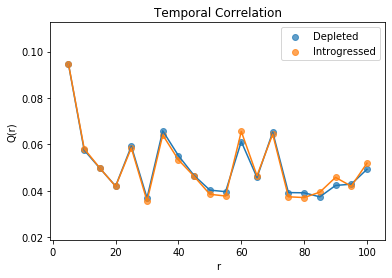

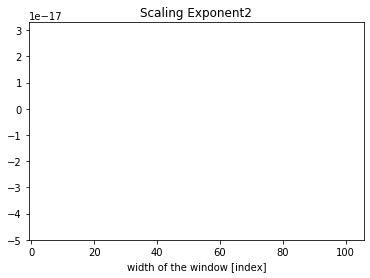

Text(0.5, 0, 'width of the window [index]')

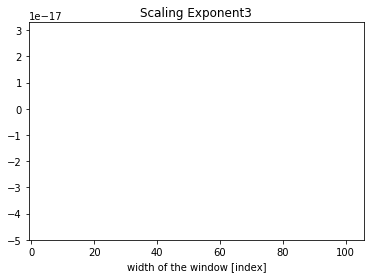

In [83]:
# Dont see any correlation..
import matplotlib.pyplot as plt
#plt.xscale=('linear')

corrs_hn=np.array([r,Cr_h,Cr_n])
corrs_hn = corrs_hn.reshape((3,len(r))).T
corrs_hn[:,-2:]=np.sqrt(corrs_hn[:,-2:])
display(pd.DataFrame(corrs_hn))
#np.savetxt(corrs_hnm)
#np.save_txt(rCr)
plt.title("Temporal Correlation")
plt.scatter(corrs_hn[:,0],corrs_hn[:,1], label="Depleted", alpha =0.7)
plt.scatter(corrs_hn[:,0],corrs_hn[:,2], label="Introgressed", alpha =0.7)
plt.plot(corrs_hn[:,0],corrs_hn[:,1])
plt.plot(corrs_hn[:,0],corrs_hn[:,2])
#plt.ylim(0,+0.025)
plt.ylabel("Q(r)")
plt.xlabel("r")
plt.legend()
plt.savefig("Temporal_corr_V31")
#plt.xscale=('log')
plt.show()


plt.title("Scaling Exponent2")
plt.scatter(r, (Cr_h), label="Introgressed",marker=7)
plt.scatter(r,(Cr_n), label="Depleted", marker=7)
plt.ylim(-5e-17,+3.3e-17)
plt.xlabel("width of the window [index]")
plt.show()


fig,ax=plt.subplots(1,1)

#SOno Correlate allo stesso modo !!
ax.set_title("Scaling Exponent3")
ax.scatter(r, (Cr_h), label="Introgressed",marker=7)
ax.scatter(r,(Cr_n), label="Depleted", marker=7)
#ax.scatter(np.exp(r),[-3e-17]*len(r), label="Depleted", marker=7)
ax.set_ylim(-5e-17,+3.3e-17)
ax.set_xlabel("width of the window [index]")

[[0.0654831  0.06148496 0.06117652 0.06775209]
 [0.06148496 0.05773092 0.05744131 0.06361541]
 [0.06117652 0.05744131 0.05715316 0.06329628]
 [0.06775209 0.06361541 0.06329628 0.07009969]]


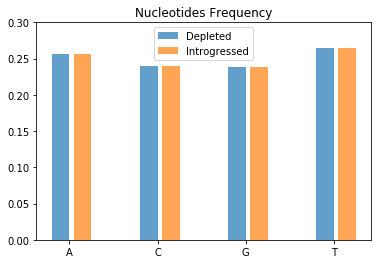

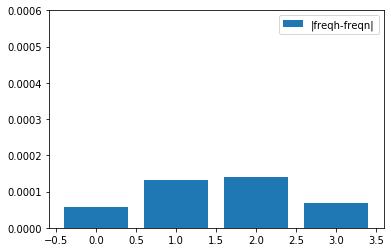

In [52]:
print(freqs_h)
plt.title("Nucleotides Frequency")
plt.bar(range(4),fh_h,0.2, label = "Depleted", alpha =0.7)
plt.bar(np.array(range(4))+0.25,fn_n,0.2, label= "Introgressed", color ="C1", alpha =0.7)
plt.xticks([0.1+i for i in range(4)], ['A','C','G','T'])
plt.ylim(0,0.3)
plt.legend()
plt.savefig("Nucleotides_f_V3")
plt.show()

plt.bar(range(4),abs(np.array(fn_n)-np.array(fh_h)), label= "|freqh-freqn|")
plt.ylim(0,+0.0006)
plt.legend()
plt.show()

## Check the words frequency for DNA

In [ ]:
DNA_length= sentence_length*N_people
#make words strings.
h_DNA = np.array([[''.join(h_DNA[i,j,:]) for i in range(h_DNA.shape[0]) ]for 
                  j in range(h_DNA.shape[1])])
#make words strings.
n_DNA = np.array([[''.join(n_DNA[i,j,:]) for i in range(n_DNA.shape[0]) ]for 
                  j in range(n_DNA.shape[1])])

print(h_DNA.shape)

array(['GCAAG', 'TTTCT', 'GTTGT', ..., 'GGCAA', 'CCGAT', 'ATTCC'],
      dtype='<U5')

here
there
20


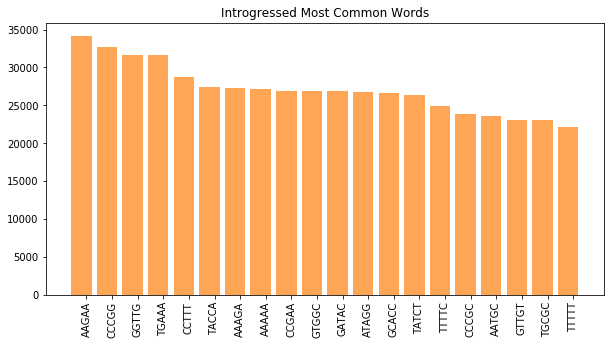

here
there
20


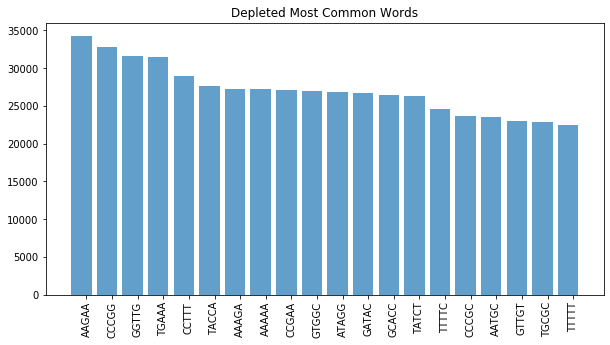

In [73]:


h_DNA_check= h_DNA.reshape(DNA_length//word_length)
n_DNA_check= n_DNA.reshape(DNA_length//word_length)
display(h_DNA_check)
h_DNA_check1=[]
n_DNA_check1=[]



from collections import Counter
import matplotlib.pyplot as  plt
##NEANDERTHAL
print("here")
counts_n=dict(Counter(n_DNA_check).most_common(20))
print("there")
labels_n, values_n = zip(*counts_n.items())

#sort
indsort_n = np.argsort(values_n)[::-1]
plt.figure(figsize=(10,5)) 
#re_arrange
plt.title("Introgressed Most Common Words")
labels_n= np.array(labels_n)[indsort_n]
values_n= np.array(values_n)[indsort_n]
indexes_n = np.arange(len(values_n))
bar_width=0.2
plt.bar(indexes_n, values_n, alpha = 0.7, color= "C1")
plt.xticks(indexes_n+bar_width,labels_n, rotation= 90)
print(len(counts_n))
plt.savefig("Introgrmw_V3", bbox_inches='tight')
plt.show()



##HUMAN
print("here")
counts_h=dict(Counter(h_DNA_check).most_common(20))
print("there")
labels_h, values_h = zip(*counts_h.items())

#sort
indsort_h = np.argsort(values_h)[::-1]
plt.figure(figsize=(10,5)) 
#re_arrange
labels_h= np.array(labels_h)[indsort_h]
values_h= np.array(values_h)[indsort_h]
indexes_h = np.arange(len(values_h))
bar_width=0.2
plt.bar(indexes_h, values_h, alpha = 0.7)
plt.title("Depleted Most Common Words")
plt.xticks(indexes_h+bar_width,labels_h, rotation= 90)
print(len(counts_h))
plt.savefig("Depletedmw_V3", bbox_inches='tight')
plt.show()




## Prepare Data for NN

In [18]:
h_DNA_NN=[' '.join(h_DNA[i,:]) for i in range(h_DNA.shape[0])]
n_DNA_NN=[' '.join(n_DNA[i,:]) for i in range(n_DNA.shape[0])]

DNA_NN = h_DNA_NN+n_DNA_NN
Y = [1]*len(h_DNA_NN)+[0]*len(n_DNA_NN)



tokenizer.fit_on_texts(DNA_NN)

encoded_docs = tokenizer.texts_to_sequences(DNA_NN)

#max_length = max([len(s.split()) for s in DNA_NN])
max_length = 200
X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')


from sklearn.model_selection import train_test_split
#X=X.reshape(X.shape[0],X.shape[1],1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, shuffle = True)

print(X_train.shape)
print(len(Y_train))
vocab_size = len(tokenizer.word_index) + 1
print(max_length)
print(vocab_size)



(80000, 200)
80000
200
1025


In [19]:
"""from tf.keras.preprocessing.text import Tokenizer
from tf.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
#test 2
Y = [1]*len(h_DNA)+[0]*len(n_DNA)
print(len(h_DNA))
print(len(Y))
X = list(h_DNA)+list(n_DNA)
print(len(X))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20,  shuffle = True)


X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train = np.array(Y_train)

#X_train=X_train.reshape((X_train.shape[0],X_train.shape[1],1))
#X_test=X_test.reshape((X_test.shape[0],X_test.shape[1],1))

print(X_train.shape)
print(Y_train.shape)"""

'from tf.keras.preprocessing.text import Tokenizer\nfrom tf.keras.preprocessing.sequence import pad_sequences\nfrom sklearn.feature_extraction.text import CountVectorizer\nfrom sklearn.feature_extraction.text import TfidfTransformer\nfrom sklearn.model_selection import train_test_split\n#test 2\nY = [1]*len(h_DNA)+[0]*len(n_DNA)\nprint(len(h_DNA))\nprint(len(Y))\nX = list(h_DNA)+list(n_DNA)\nprint(len(X))\nX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20,  shuffle = True)\n\n\nX_train=np.array(X_train)\nX_test=np.array(X_test)\nY_train = np.array(Y_train)\n\n#X_train=X_train.reshape((X_train.shape[0],X_train.shape[1],1))\n#X_test=X_test.reshape((X_test.shape[0],X_test.shape[1],1))\n\nprint(X_train.shape)\nprint(Y_train.shape)'

## Let's build an LSTM NN

In [20]:
"""    from tf.keras.models import Sequential
    from tf.keras.callbacks import ModelCheckpoint
    from tf.keras.optimizers import SGD, Adam, Adadelta, RMSprop
    from tf.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
    from tf.keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU, Bidirectional
    from tf.keras.layers.convolutional_recurrent import ConvLSTM2D
    from tf.keras import regularizers

    model = Sequential()
    model.add(Embedding(vocab_size, 32, input_length = max_length, dropout = 0.2))
    #model.add(SimpleRNN(10, dropout = 0.2, recurrent_dropout = 0.2))  #this sucks
    model.add(LSTM(10, dropout = 0.2, recurrent_dropout = 0.2))  #totally killing it
    #model.add(Conv1D(10, dropout = 0.2, recurrent_dropout = 0.2)) 

    model.add(Dense(5,
                    kernel_regularizer=regularizers.l2(0.01),
                    activity_regularizer=regularizers.l1(0.01)))
    model.add(Dense(1, activation = 'sigmoid'))


    model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
    checkpoint = ModelCheckpoint("weights.best.hdf5", monitor = 'val_acc', verbose = 1, 
                                 save_best_only = True, mode = 'max')
    print(model.summary())"""

'    from tf.keras.models import Sequential\n    from tf.keras.callbacks import ModelCheckpoint\n    from tf.keras.optimizers import SGD, Adam, Adadelta, RMSprop\n    from tf.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout\n    from tf.keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU, Bidirectional\n    from tf.keras.layers.convolutional_recurrent import ConvLSTM2D\n    from tf.keras import regularizers\n\n    model = Sequential()\n    model.add(Embedding(vocab_size, 32, input_length = max_length, dropout = 0.2))\n    #model.add(SimpleRNN(10, dropout = 0.2, recurrent_dropout = 0.2))  #this sucks\n    model.add(LSTM(10, dropout = 0.2, recurrent_dropout = 0.2))  #totally killing it\n    #model.add(Conv1D(10, dropout = 0.2, recurrent_dropout = 0.2)) \n\n    model.add(Dense(5,\n                    kernel_regularizer=regularizers.l2(0.01),\n                    activity_regularizer=regularizers.l1(0.01)))\n    model.add(Dense(1, activation = \'sig

## NN

In [21]:
"""print(X_train.shape)
print(max_length)

n_clusters=1
#inputs= keras.Input(shape=(max_length,1))
inputs= tensorflow.keras.Input(shape=(max_length))
emb=Embedding(vocab_size, 32, input_length = max_length)(inputs)
f=Flatten()(emb)
#merge=concatenate([l for l in lstm])
d=Dense( 50)(f)
#d=Dense(10,kernel_regularizer=regularizers.l2(0.02))(lstm[0])
d1=Dense(20)(d)
d1=Dense(10)(d)
f=Dense(1, activation = 'sigmoid')(d1)

model = tensorflow.keras.Model(inputs = inputs , outputs = f, name = "test")
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

from keras.models import load_model


#model.save('model_P'+str(1-3*old_det)+'.h5')  



# returns a compiled model
# identical to the previous one
#model = load_model('model_P'+str(1-3*old_det)+'.h5')
#model.load_weights('model_weights_P.h5')


#old_det = det

tensorflow.keras.utils.plot_model(model, show_shapes = True)"""

'print(X_train.shape)\nprint(max_length)\n\nn_clusters=1\n#inputs= keras.Input(shape=(max_length,1))\ninputs= tensorflow.keras.Input(shape=(max_length))\nemb=Embedding(vocab_size, 32, input_length = max_length)(inputs)\nf=Flatten()(emb)\n#merge=concatenate([l for l in lstm])\nd=Dense( 50)(f)\n#d=Dense(10,kernel_regularizer=regularizers.l2(0.02))(lstm[0])\nd1=Dense(20)(d)\nd1=Dense(10)(d)\nf=Dense(1, activation = \'sigmoid\')(d1)\n\nmodel = tensorflow.keras.Model(inputs = inputs , outputs = f, name = "test")\nmodel.compile(loss = \'binary_crossentropy\', optimizer = \'rmsprop\', metrics = [\'accuracy\'])\n\nfrom keras.models import load_model\n\n\n#model.save(\'model_P\'+str(1-3*old_det)+\'.h5\')  \n\n\n\n# returns a compiled model\n# identical to the previous one\n#model = load_model(\'model_P\'+str(1-3*old_det)+\'.h5\')\n#model.load_weights(\'model_weights_P.h5\')\n\n\n#old_det = det\n\ntensorflow.keras.utils.plot_model(model, show_shapes = True)'

## CNN

(80000, 200)
200


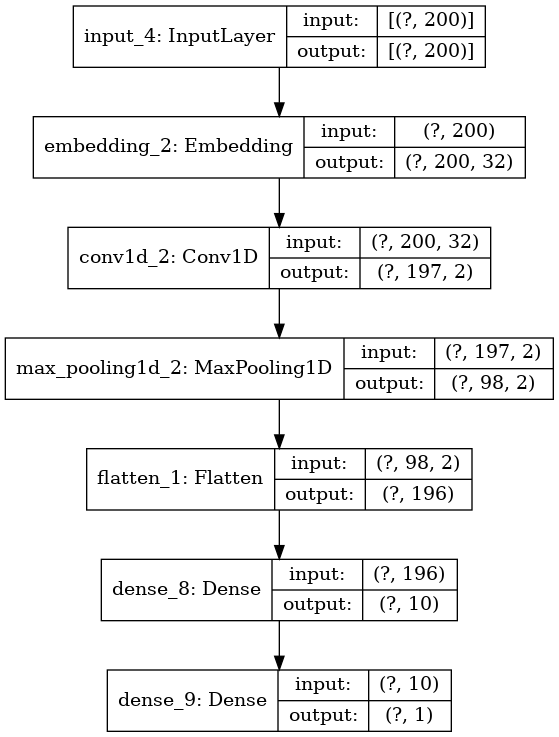

In [29]:
print(X_train.shape)
print(max_length)

n_clusters=1
#inputs= keras.Input(shape=(max_length,1))
inputs= tensorflow.keras.Input(shape=(200,))
emb=Embedding(vocab_size, 32, input_length = max_length)(inputs)
lstm=[]
conv1 = Conv1D(filters=2,
               kernel_size=4,
               strides=1,
               activation='relu')(emb)
pool1 = MaxPooling1D(pool_size=2)(conv1)
#for i in range(n_clusters):
    #lstm.append(Bidirectional(LSTM(N_genes, dropout=0.1))(emb))
#    lstm.append(Bidirectional(LSTM(N_genes))(emb))
f=Flatten()(pool1)
#merge=concatenate([l for l in lstm])
d=Dense(10 )(f)
#d=Dense(10,kernel_regularizer=regularizers.l2(0.02))(lstm[0])
#d1=Dense(5)(d)
f=Dense(1, activation = 'sigmoid')(d)

model = tensorflow.keras.Model(inputs = inputs , outputs = f, name = "test")
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

from keras.models import load_model


#model.save('model_P'+str(1-3*old_det)+'.h5')  



# returns a compiled model
# identical to the previous one
#model = load_model('model_P'+str(1-3*old_det)+'.h5')
#model.load_weights('model_weights_P.h5')


#old_det = det

tensorflow.keras.utils.plot_model(model, show_shapes = True)

In [30]:
epochs = 40 
#X_train= X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
shuffle = list(range(len(Y_train)))

X_train = np.array(X_train)
Y_train=np.array(Y_train)

np.random.shuffle(shuffle)
X_train = np.array(X_train[shuffle])
Y_train=np.array(Y_train[shuffle])
history = model.fit(X_train, Y_train, epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 50, shuffle = True)


Train on 64000 samples, validate on 16000 samples
Epoch 1/40
64000/64000 [==============================] - 10s 161us/sample - loss: 0.2402 - accuracy: 0.8997 - val_loss: 0.1249 - val_accuracy: 0.9501
Epoch 2/40
64000/64000 [==============================] - 10s 161us/sample - loss: 0.1042 - accuracy: 0.9612 - val_loss: 0.1098 - val_accuracy: 0.9584
Epoch 3/40
64000/64000 [==============================] - 11s 168us/sample - loss: 0.0857 - accuracy: 0.9684 - val_loss: 0.1275 - val_accuracy: 0.9523
Epoch 4/40
64000/64000 [==============================] - 9s 142us/sample - loss: 0.0740 - accuracy: 0.9731 - val_loss: 0.1090 - val_accuracy: 0.9607
Epoch 5/40
64000/64000 [==============================] - 8s 126us/sample - loss: 0.0665 - accuracy: 0.9757 - val_loss: 0.1055 - val_accuracy: 0.9621
Epoch 6/40
64000/64000 [==============================] - 8s 118us/sample - loss: 0.0606 - accuracy: 0.9787 - val_loss: 0.1147 - val_accuracy: 0.9623
Epoch 7/40
64000/64000 [=======================

(80000, 200)
200


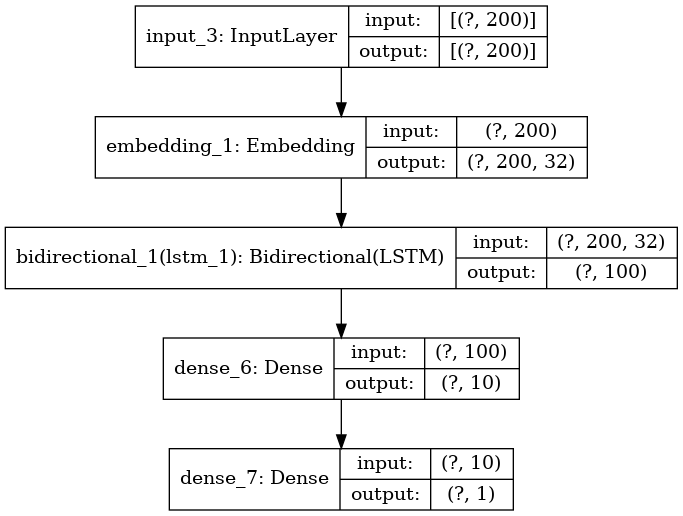

In [24]:
print(X_train.shape)
print(max_length)

n_clusters=1
#inputs= keras.Input(shape=(max_length,1))
inputs= tensorflow.keras.Input(shape=(200,))
emb=Embedding(vocab_size, 32, input_length = max_length)(inputs)
lstm=[]
conv1 = Conv1D(filters=2,
               kernel_size=4,
               strides=1,
               activation='relu')(emb)
pool1 = MaxPooling1D(pool_size=2)(conv1)
for i in range(n_clusters):
    #lstm.append(Bidirectional(LSTM(N_genes, dropout=0.1))(emb))
    lstm.append(Bidirectional(LSTM(N_genes))(emb))

#merge=concatenate([l for l in lstm])
d=Dense(10 )(lstm[0])
#d=Dense(10,kernel_regularizer=regularizers.l2(0.02))(lstm[0])
#d1=Dense(5)(d)
f=Dense(1, activation = 'sigmoid')(d)

model = tensorflow.keras.Model(inputs = inputs , outputs = f, name = "test")
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

from keras.models import load_model


#model.save('model_P'+str(1-3*old_det)+'.h5')  



# returns a compiled model
# identical to the previous one
#model = load_model('model_P'+str(1-3*old_det)+'.h5')
model.load_weights('model_weights_P.h5')


#old_det = det

tensorflow.keras.utils.plot_model(model, show_shapes = True)


#Manopole
#decide the percentage of geneDNA in a sentence.
pc_genes=0.7
#How many genes?
N_genes= 30
#Choose genes to correlate
#How many?
avg_dimension_of_correlation_clusters=10
b=0.5 #how different are different genes ? max 0.5
fraction_of_mutations_per_gene=1#percentage of random mutations in gene variants
variants=4 #how may variants?
det=0.0  #how much deterministic is the markov chain 0 MAX 0.25 Min  shuffle(prob(det det det 1-3*det))
forward_mc = False#do you want forward markov chain?
N_people= 3000
sentence_length= 999 #HOW LONG A SENTENCE in letters
word_length=3 #HOW LONG A WORD in letters

same = True
with embedding -> WORKSS!! Thus no random..


worked with det = 0.05

30 it 80% acc

det = 0.01
30 it   67%

In [25]:

#X_train= X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
shuffle = list(range(len(Y_train)))

X_train = np.array(X_train)
Y_train=np.array(Y_train)

np.random.shuffle(shuffle)
X_train = np.array(X_train[shuffle])
Y_train=np.array(Y_train[shuffle])
history = model.fit(X_train, Y_train, epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 50, shuffle = True)


Train on 64000 samples, validate on 16000 samples
Epoch 1/40
64000/64000 [==============================] - 58s 912us/sample - loss: 0.6600 - accuracy: 0.8512 - val_loss: 0.0643 - val_accuracy: 0.9776
Epoch 2/40
64000/64000 [==============================] - 48s 743us/sample - loss: 0.0320 - accuracy: 0.9886 - val_loss: 0.0302 - val_accuracy: 0.9900
Epoch 3/40
64000/64000 [==============================] - 53s 828us/sample - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.0228 - val_accuracy: 0.9927
Epoch 4/40
64000/64000 [==============================] - 52s 814us/sample - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0298 - val_accuracy: 0.9935
Epoch 5/40
64000/64000 [==============================] - 49s 761us/sample - loss: 9.9578e-04 - accuracy: 0.9997 - val_loss: 0.0290 - val_accuracy: 0.9945
Epoch 6/40
64000/64000 [==============================] - 46s 723us/sample - loss: 2.6482e-04 - accuracy: 0.9999 - val_loss: 0.0365 - val_accuracy: 0.9944
Epoch 7/40
64000/64000 [============

In [26]:
# Save the weights
model.save_weights('model_weights_P.h5')


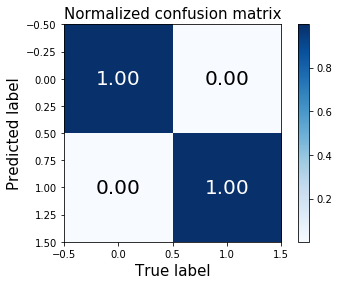

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

predicted_labels = model.predict(X_test)
cm = confusion_matrix(Y_test, [np.round(i[0]) for i in predicted_labels])
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]



plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 15)
plt.colorbar()
plt.xlabel('True label', fontsize = 15)
plt.ylabel('Predicted label', fontsize = 15)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()